In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 26/11/2019
Initialization for S1PL, Notebook was last run on: 26/11/2019


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data_1 = data[data['s1']<3e4]
data_1_rej = data_1[data_1['z_3d_nn_tf']<-70]
data_1_acc = data_1[data_1['z_3d_nn_tf']>-70]

In [4]:
energy_peak = np.array([42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]) #keV
resolution = np.array([0.0516, 0.0260, 0.0223, 0.0137, 0.0117, 0.0109, 0.0103, 0.0091, 0.0092, 0.0081, 0.0081])
sigma_peak = energy_peak*resolution
energy_peak_lower = energy_peak-sigma_peak
energy_peak_higher = energy_peak+sigma_peak

In [5]:
#######################################################################################################
##
##                                        Acceptance
##
#######################################################################################################

#83 Kr
gamma42_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[0])&(data_1_acc['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[0])&(data_1_acc['CES']/10**3>=energy_peak_lower[0])
#131m Xe 
gamma164_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[1])&(data_1_acc['CES']/10**3>=energy_peak_lower[1])]
cut_gamma164_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[1])&(data_1_acc['CES']/10**3>=energy_peak_lower[1])
#129m Xe
gamma236_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[2])&(data_1_acc['CES']/10**3>=energy_peak_lower[2])]
cut_gamma236_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[2])&(data_1_acc['CES']/10**3>=energy_peak_lower[2])
#214 Bi
gamma609_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[3])&(data_1_acc['CES']/10**3>=energy_peak_lower[3])]
cut_gamma609_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[3])&(data_1_acc['CES']/10**3>=energy_peak_lower[3])
#214 Bi
gamma1120_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[4])&(data_1_acc['CES']/10**3>=energy_peak_lower[4])]
cut_gamma1120_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[4])&(data_1_acc['CES']/10**3>=energy_peak_lower[4])
#60 Co
gamma1173_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[5])&(data_1_acc['CES']/10**3>=energy_peak_lower[5])]
cut_gamma1173_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[5])&(data_1_acc['CES']/10**3>=energy_peak_lower[5])
#60 Co
gamma1332_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[6])&(data_1_acc['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[6])&(data_1_acc['CES']/10**3>=energy_peak_lower[6])
#40 K
gamma1461_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[7])&(data_1_acc['CES']/10**3>=energy_peak_lower[7])]
cut_gamma1461_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[7])&(data_1_acc['CES']/10**3>=energy_peak_lower[7])
#214 Bi
gamma1764_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[8])&(data_1_acc['CES']/10**3>=energy_peak_lower[8])]
cut_gamma1764_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[8])&(data_1_acc['CES']/10**3>=energy_peak_lower[8])
#214 Bi 
gamma2204_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[9])&(data_1_acc['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[9])&(data_1_acc['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614_acc = data_1_acc[(data_1_acc['CES']/10**3<=energy_peak_higher[10])&(data_1_acc['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614_acc = (data_1_acc['CES']/10**3<=energy_peak_higher[10])&(data_1_acc['CES']/10**3>=energy_peak_lower[10])

In [6]:
data_gamma_acc = pd.concat([gamma42_acc, gamma164_acc, gamma236_acc, gamma609_acc, gamma1120_acc,
                            gamma1173_acc, gamma1332_acc, gamma1461_acc, gamma1764_acc, gamma2204_acc, gamma2614_acc])

In [7]:
#######################################################################################################
##
##                                        Rejection
##
#######################################################################################################

#83 Kr
gamma42_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[0])&(data_1_rej['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[0])&(data_1_rej['CES']/10**3>=energy_peak_lower[0])
#131m Xe 
gamma164_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[1])&(data_1_rej['CES']/10**3>=energy_peak_lower[1])]
cut_gamma164_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[1])&(data_1_rej['CES']/10**3>=energy_peak_lower[1])
#129m Xe
gamma236_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[2])&(data_1_rej['CES']/10**3>=energy_peak_lower[2])]
cut_gamma236_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[2])&(data_1_rej['CES']/10**3>=energy_peak_lower[2])
#214 Bi
gamma609_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[3])&(data_1_rej['CES']/10**3>=energy_peak_lower[3])]
cut_gamma609_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[3])&(data_1_rej['CES']/10**3>=energy_peak_lower[3])
#214 Bi
gamma1120_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[4])&(data_1_rej['CES']/10**3>=energy_peak_lower[4])]
cut_gamma1120_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[4])&(data_1_rej['CES']/10**3>=energy_peak_lower[4])
#60 Co
gamma1173_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[5])&(data_1_rej['CES']/10**3>=energy_peak_lower[5])]
cut_gamma1173_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[5])&(data_1_rej['CES']/10**3>=energy_peak_lower[5])
#60 Co
gamma1332_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[6])&(data_1_rej['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[6])&(data_1_rej['CES']/10**3>=energy_peak_lower[6])
#40 K
gamma1461_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[7])&(data_1_rej['CES']/10**3>=energy_peak_lower[7])]
cut_gamma1461_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[7])&(data_1_rej['CES']/10**3>=energy_peak_lower[7])
#214 Bi
gamma1764_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[8])&(data_1_rej['CES']/10**3>=energy_peak_lower[8])]
cut_gamma1764_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[8])&(data_1_rej['CES']/10**3>=energy_peak_lower[8])
#214 Bi 
gamma2204_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[9])&(data_1_rej['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[9])&(data_1_rej['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614_rej = data_1_rej[(data_1_rej['CES']/10**3<=energy_peak_higher[10])&(data_1_rej['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614_rej = (data_1_rej['CES']/10**3<=energy_peak_higher[10])&(data_1_rej['CES']/10**3>=energy_peak_lower[10])

In [8]:
data_gamma_rej = pd.concat([gamma42_rej, gamma164_rej, gamma236_rej, gamma609_rej, gamma1120_rej,
                            gamma1173_rej, gamma1332_rej, gamma1461_rej, gamma1764_rej, gamma2204_rej, gamma2614_rej])

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


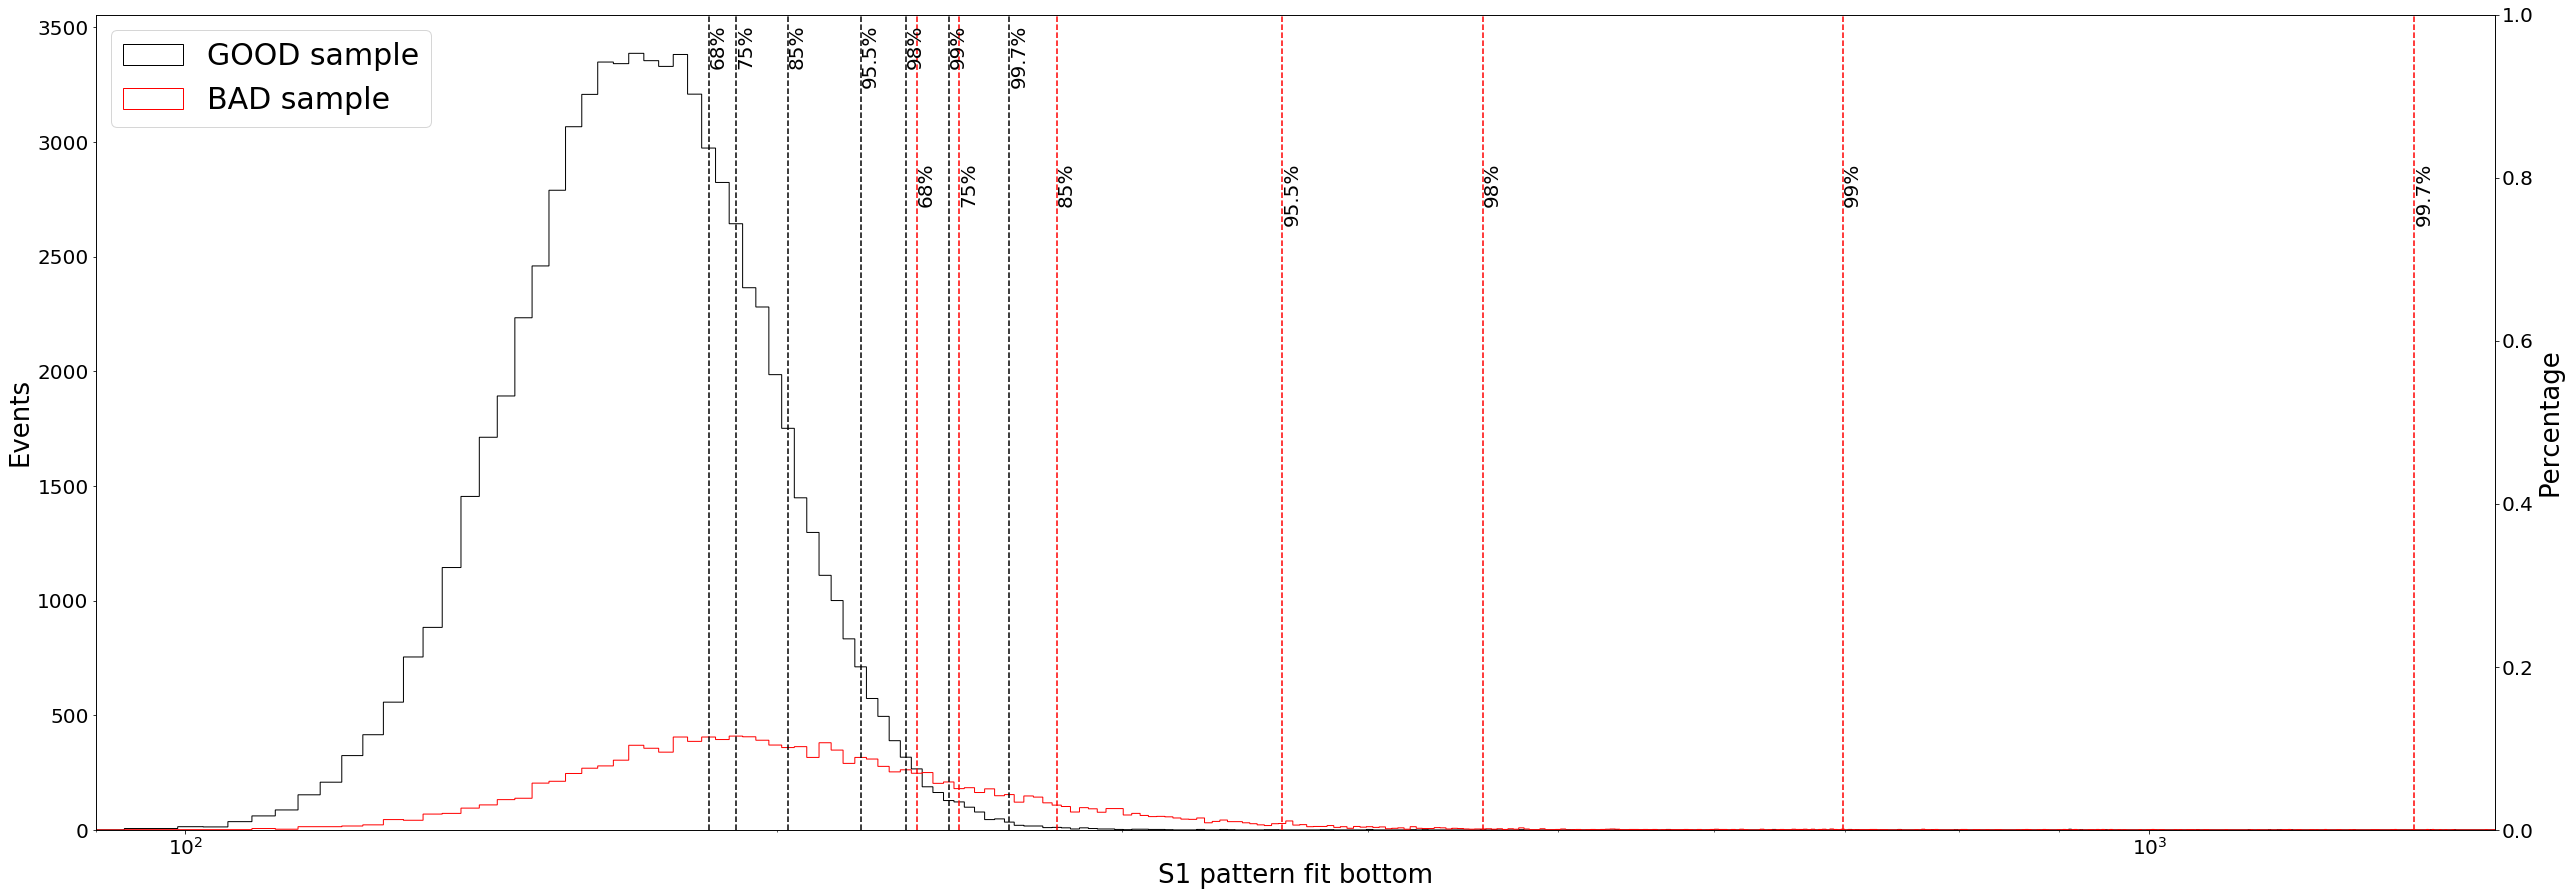

In [12]:
plt.figure(figsize=(43,15))

#########################################################################################
ax1 = plt.subplot()
ax2 = plt.subplot()
x_bin=np.linspace(0,3e3, 1000)
x_center = [0.5*(x_bin[i]+x_bin[i+1]) for i in range(len(x_bin)-1)]

ax1.set_xlabel('S1 pattern fit bottom', fontsize=26)
ax1.set_ylabel('Events', color='black',  fontsize=26)
ax1.tick_params(axis='y', labelcolor='black', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
hist_acc, xbins_acc, _ = ax1.hist(data_gamma_acc['s1_pattern_fit_bottom_hax'], bins=x_bin, color='black', 
                                  label='GOOD sample', histtype='step', normed=False)
hist_rej, xbins_rej, _ = ax2.hist(data_gamma_rej['s1_pattern_fit_bottom_hax'], bins=x_bin, color='red', 
                                  label='BAD sample', histtype='step', normed=False)

x_center_acc = [0.5*(xbins_acc[i]+xbins_acc[i+1]) for i in range(len(xbins_acc)-1)]
x_center_rej = [0.5*(xbins_rej[i]+xbins_rej[i+1]) for i in range(len(xbins_rej)-1)]
#########################################################################################

#########################################################################################
ax3= ax1.twinx()
ax3.set_ylabel('Percentage', color='black', fontsize=26)
res_acc =  1. - np.cumsum(hist_acc)/np.sum(hist_acc)
res_rej =  1. - np.cumsum(hist_rej)/np.sum(hist_rej)
#ax3.plot(x_center, res_acc, color='darkblue')
#ax3.plot(x_center, res_rej, color='crimson')
ax3.tick_params(axis='y', labelcolor='black', labelsize=20)


#ax3.set_ylim(bottom=-0.0628, top=1)
#ax2.set_yscale('log')#
#########################################################################################

idx_1_acc = get_first_index_nb(res_acc, 0.003) #99.7%
idx_7_acc = get_first_index_nb(res_acc, 0.01) #99%
idx_6_acc = get_first_index_nb(res_acc, 0.02) #98%
idx_2_acc = get_first_index_nb(res_acc, 0.045) #95.5%
idx_3_acc = get_first_index_nb(res_acc, 0.15) #85%
idx_4_acc = get_first_index_nb(res_acc, 0.25) #75%
idx_5_acc = get_first_index_nb(res_acc, 0.32) #68%

idx_1_rej = get_first_index_nb(res_rej, 0.003) #99.7%
idx_7_rej = get_first_index_nb(res_rej, 0.01) #99%
idx_6_rej = get_first_index_nb(res_rej, 0.02) #98%
idx_2_rej = get_first_index_nb(res_rej, 0.045) #95.5%
idx_3_rej = get_first_index_nb(res_rej, 0.15) #85%
idx_4_rej = get_first_index_nb(res_rej, 0.25) #75%
idx_5_rej = get_first_index_nb(res_rej, 0.32) #68%

#########################################################################################

#########################################################################################
ax3.vlines(x=x_center_acc[idx_1_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_1_acc]+0.01, (1-0.03), '99.7%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_1_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_1_rej]+0.01, (1-0.2), '99.7%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_7_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_7_acc]+0.01, (1-0.03), '99%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_7_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_7_rej]+0.01, (1-0.2), '99%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_6_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_6_acc]+0.01, (1-0.03), '98%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_6_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_6_rej]+0.01, (1-0.2), '98%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_2_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_2_acc]+0.01, (1-0.03), '95.5%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_2_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_2_rej]+0.01, (1-0.2), '95.5%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_3_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_3_acc]+0.01, (1-0.03), '85%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_3_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_3_rej]+0.01, (1-0.2), '85%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_4_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_4_acc]+0.01, (1-0.03), '75%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_4_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_4_rej]+0.01, (1-0.2), '75%', size=20, rotation=90)

ax3.vlines(x=x_center_acc[idx_5_acc], ymin=0, ymax=1, colors='black', linestyles='dashed', label='')
ax3.text(x_center_acc[idx_5_acc]+0.01, (1-0.03), '68%', size=20, rotation=90)

ax3.vlines(x=x_center_rej[idx_5_rej], ymin=0, ymax=1, colors='red', linestyles='dashed', label='')
ax3.text(x_center_rej[idx_5_rej]+0.01, (1-0.2), '68%', size=20, rotation=90)
#########################################################################################
#ax1.set_xlim(left=0, right=1500)
#ax2.set_xlim(left=0, right=1500)
#ax3.set_xlim(left=0, right=1500)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0, top=1)
ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.set_xlim(left=9*10, right=1.5e3)

ax1.legend(loc=2, fontsize=30)
ax2.legend(loc=2, fontsize=30)
ax3.legend(loc=2, fontsize=30)